<a href="https://colab.research.google.com/github/nik0laygavrIlov/DA_ML_repo/blob/main/Titanic_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle-соревнование

## Знакомство с данными

Импортируем библиотеки. Загружаем датасет

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import train_test_split

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Имеем 11 признаков:

PassengerId - будем считать бесполезным, удаляем;

Pclass - оставляем label encoding представление;

Name - оставляем 1-ю букву фамилии, преобразуем в label encoding;

Sex - преобразуем в one-hot представление;

Age - квазинепрерывный, оставляем как есть;

SibSp, Parch - дискретный, оставляем как есть;

Ticket - будем считать бесполезным, удаляем;

Fare - непрерывный, оставляем как есть;

Cabin - слишком много пропусков, удаляем;

Embarked - преобразуем в label encoding.








In [ ]:
df_train = df_train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [ ]:
df_train['Name'] = df_train['Name'].apply(lambda x: x.split(',')[0])
df_test['Name'] = df_test['Name'].apply(lambda x: x.split(',')[0])

In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Braund,male,22.0,1,0,7.2500,S
1,1,1,Cumings,female,38.0,1,0,71.2833,C
2,1,3,Heikkinen,female,26.0,0,0,7.9250,S
3,1,1,Futrelle,female,35.0,1,0,53.1000,S
4,0,3,Allen,male,35.0,0,0,8.0500,S


In [ ]:
df_train['Name'].unique().size

667

In [ ]:
df_train['Name'].count()

891

Если каждой фамилии мы теперь присвоим метку получится очень много классов. Возьмем первую букву каждой фамилии

In [ ]:
df_train['Name'] = df_train['Name'].astype(str)
df_train['Name'] = df_train['Name'].apply(lambda x: x[0])
df_train['Name'].unique().size

27

In [ ]:
df_test['Name'] = df_test['Name'].astype(str)
df_test['Name'] = df_test['Name'].apply(lambda x: x[0])
df_test['Name'].unique().size

25

In [ ]:
def is_letter(A:list, B:list):
### Проверяем, нет ли df_test букв, которых нет в df_train
  for x in B:
    if x not in A:
      print(x)
      print('Есть другие буквы')
      break
  print('Нет других букв')

A = list(df_train['Name'].unique())
B = list(df_test['Name'].unique())
is_letter(A, B)

Нет других букв


In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,B,male,22.0,1,0,7.2500,S
1,1,1,C,female,38.0,1,0,71.2833,C
2,1,3,H,female,26.0,0,0,7.9250,S
3,1,1,F,female,35.0,1,0,53.1000,S
4,0,3,A,male,35.0,0,0,8.0500,S


In [ ]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,K,male,34.5,0,0,7.8292,Q
1,3,W,female,47.0,1,0,7.0000,S
2,2,M,male,62.0,0,0,9.6875,Q
3,3,W,male,27.0,0,0,8.6625,S
4,3,H,female,22.0,1,1,12.2875,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train['Name'] = label_encoder.fit_transform(df_train['Name'])
df_test['Name'] = label_encoder.fit_transform(df_test['Name'])

label_encoder_ = LabelEncoder()
df_train['Embarked'] = label_encoder_.fit_transform(df_train['Embarked'])
df_test['Embarked'] = label_encoder_.fit_transform(df_test['Embarked'])

In [ ]:
df_train = pd.get_dummies(df_train, columns=['Sex'])
df_test = pd.get_dummies(df_test, columns=['Sex'])

In [ ]:
df_train = df_train.drop(['Sex_female'], axis=1)
df_test = df_test.drop(['Sex_female'], axis=1)

In [ ]:
df_train['Sex_male'] = df_train['Sex_male'].apply(lambda x: int(x))
df_test['Sex_male'] = df_test['Sex_male'].apply(lambda x: int(x))

In [ ]:
df_train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,2,38.0,1,0,71.2833,0,0
2,1,3,7,26.0,0,0,7.9250,2,0
3,1,1,5,35.0,1,0,53.1000,2,0
4,0,3,0,35.0,0,0,8.0500,2,1


In [ ]:
df_test.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,3,10,34.5,0,0,7.8292,1,1
1,3,21,47.0,1,0,7.0000,2,0
2,2,12,62.0,0,0,9.6875,1,1
3,3,21,27.0,0,0,8.6625,2,1
4,3,7,22.0,1,1,12.2875,2,0


Проверим null-ы

In [ ]:
df_test.isna().sum()

,0
Pclass,0
Name,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0
Sex_male,0


In [ ]:
df_train.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0
Sex_male,0


Null-ов не так много, а возраст - важный атрибут. Поэтому удалим их

In [ ]:
df_train = df_train[df_train['Age'].notna() & df_train['Fare'].notna()]

In [ ]:
df_test = df_test[df_test['Age'].notna() & df_test['Fare'].notna()]

In [ ]:
df_train.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Sex_male,0


In [ ]:
df_test.isna().sum()

,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Sex_male,0


Все null-ы удалились.

Мы получили датасет, пригодный для анализа и обучения модели. Приступим к EDA.

## EDA, отбор признаков

Посмотрим типы данных.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Name      714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  714 non-null    int64  
 8   Sex_male  714 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 55.8 KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 415
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    331 non-null    int64  
 1   Name      331 non-null    int64  
 2   Age       331 non-null    float64
 3   SibSp     331 non-null    int64  
 4   Parch     331 non-null    int64  
 5   Fare      331 non-null    float64
 6   Embarked  331 non-null    int64  
 7   Sex_male  331 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 23.3 KB


Признак Age приведем к типу int.

In [ ]:
df_train['Age'] = df_train['Age'].astype('int')
df_test['Age'] = df_test['Age'].astype('int')

<ipython-input-72-ee3512035413>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-ee3512035413>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Name      714 non-null    int64  
 3   Age       714 non-null    int64  
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  714 non-null    int64  
 8   Sex_male  714 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 55.8 KB


In [ ]:
pd.value_counts(df_train['Survived'])

<ipython-input-74-12e683d60806>:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



,count
Survived,
0,424
1,290


In [ ]:
import plotly
import plotly.express as px

Визуализируем отношение количества выживших и погибших.

<ipython-input-76-6d1283520015>:4: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



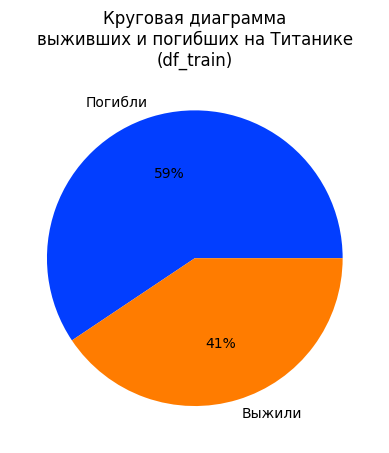

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.value_counts(df_train['Survived'])
labels = ['Погибли', 'Выжили']

colors = sns.color_palette('bright')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Круговая диаграмма\nвыживших и погибших на Титанике\n(df_train)')
plt.show()

In [ ]:
df_train.count().max()

714

Визуализируем количество выживших по классам.

In [ ]:
treemap_data = df_train.groupby(
    by='Pclass',
    as_index=False
)[['Survived']].sum()

fig = px.treemap(
    data_frame=treemap_data,
    path=['Pclass'],
    values='Survived',
    height=500,
    width=700,
    title='Количество выживших по классам'
)

fig.update_traces(textposition="middle center",
                  textinfo="label+value",
                  textfont_size=40)

fig.show()

Теперь по погибшим.

In [ ]:
treemap_data_ = df_train[df_train['Survived'] == 0].groupby(
    by='Pclass',
    as_index=False
    )['Survived'].count()

fig = px.treemap(
    data_frame=treemap_data_,
    path=['Pclass'],
    values='Survived',
    height=500,
    width=700,
    title='Количество погибших по классам'
)

fig.update_traces(textposition="middle center",
                  textinfo="label+value",
                  textfont_size=40
                  )

fig.show()

Как видим, статистика по погибшим дает более интуитивно ясное представление.

Посмотрим, есть ли выбросы в столбцах Age и Fare.

Text(0.5, 1.0, 'Fare Boxplot')

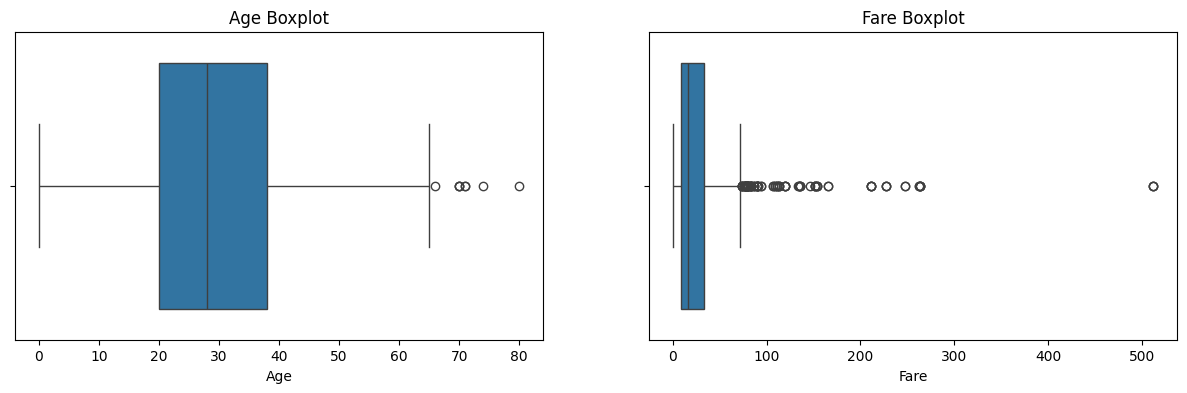

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

boxplot_1 = sns.boxplot(data=df_train, x='Age', ax=axes[0])
boxplot_2 = sns.boxplot(data=df_train, x='Fare', ax=axes[1])

boxplot_1.set_title('Age Boxplot')
boxplot_2.set_title('Fare Boxplot')

Построим гистограммы Age и Fare

Text(0.5, 1.0, 'Fare Distribution')

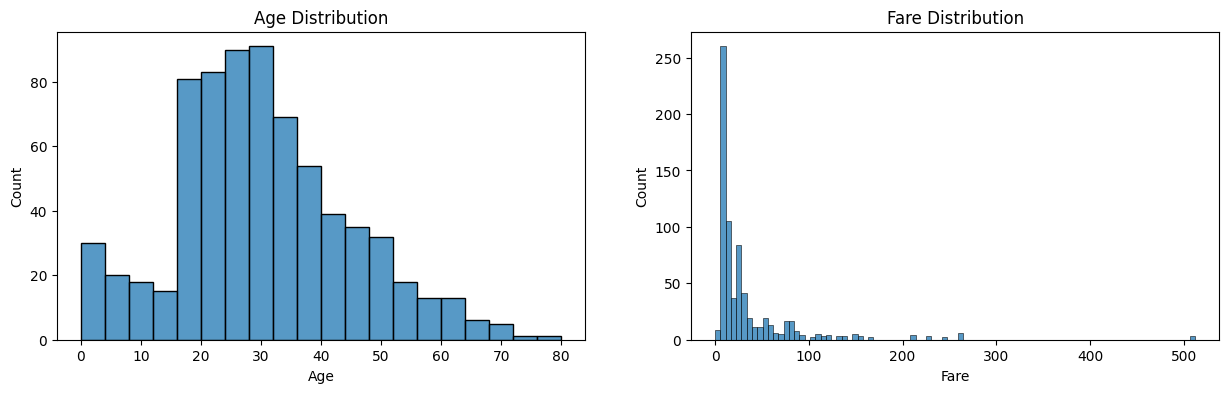

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot_1 = sns.histplot(data=df_train, x='Age', ax=axes[0])
histplot_2 = sns.histplot(data=df_train, x='Fare', ax=axes[1])

histplot_1.set_title('Age Distribution')
histplot_2.set_title('Fare Distribution')

Гистограммы указывают, что ни один из признаков не распределен нормально. Попробуем прологарифмировать оба признака и посмотрим, что получится.

In [ ]:
df_train['log_Age'] = df_train['Age'].apply(lambda x: np.log(x + 1))

In [ ]:
df_train['log_Fare'] = df_train['Fare'].apply(lambda x: np.log(x + 1))

Text(0.5, 1.0, 'log Fare Distribution')

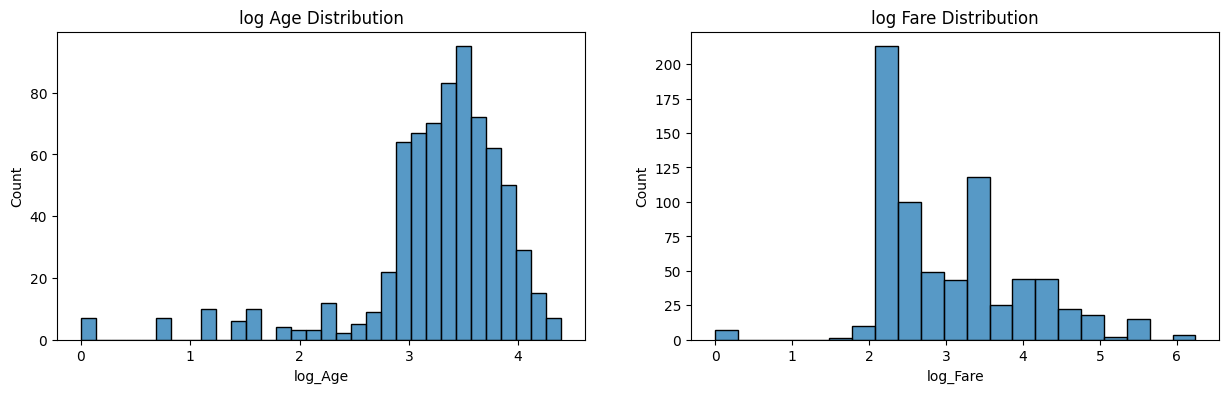

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot_1 = sns.histplot(data=df_train, x='log_Age', ax=axes[0])
histplot_2 = sns.histplot(data=df_train, x='log_Fare', ax=axes[1])

histplot_1.set_title('log Age Distribution')
histplot_2.set_title('log Fare Distribution')

Посмотрим, распределены ли нормально Fare или log_Fare у пассажиров 2-го класса.

In [ ]:
sample = np.array(df_train[df_train['Pclass'] == 2]['Fare'])
print(f'p-value Fare по Д\'Агостино: {sp.stats.normaltest(sample).pvalue}')
print(f'p-value Fare по Харке-Бера: {sp.stats.jarque_bera(sample).pvalue}')

p-value Fare по Д'Агостино: 1.9962855749520542e-21
p-value Fare по Харке-Бера: 1.0740892491190712e-84


In [ ]:
sample = np.array(df_train[df_train['Pclass'] == 2]['log_Fare'])
print(f'p-value log_Fare по Д\'Агостино: {sp.stats.normaltest(sample).pvalue}')
print(f'p-value log_Fare по Харке-Бера: {sp.stats.jarque_bera(sample).pvalue}')

p-value log_Fare по Д'Агостино: 0.0003015001801192739
p-value log_Fare по Харке-Бера: 9.716248731735619e-05


С первого взгляда кажется логичным, распределение цен на билеты по всему Титанику представляет собой смесь 3-х гауссианов, соответствующих каждому из классов. Однако тест показывает, что это не так.

Ни распределение Fare, ни распределение log_Fare не является нормальным. Однако признак log_Fare лучше отцентрован. Оставим его и удалим Fare. То же сделаем для тестового датасета.

Распределение log_Age похоже на нормальное. Обработаем выбросы и проведем статистические тесты.

In [ ]:
df_test['log_Fare'] = df_test['Fare'].apply(lambda x: np.log(x + 1))
df_train = df_train.drop(['Fare'], axis=1)
df_test = df_test.drop(['Fare'], axis=1)

Количество выбросов определим по методу Тьюки.

In [ ]:
def outliers_iqr(data, feature, log_scale=False, left=1.5, right=1.5):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [ ]:
outliers, cleaned = outliers_iqr(df_train, 'log_Age')

print(f'Число выбросов по методу Тьюки (1.5 IQR): {outliers.shape[0]}')

Число выбросов по методу Тьюки (1.5 IQR): 50


Поскольку число sampl-ов в log_Age очень большое, будем использовать в качестве статистического критерия тест Д'Агостино.

In [ ]:
import scipy as sp

sample = np.array(cleaned['log_Age'])
print(f'p-value log_Age по Д\'Агостино: {sp.stats.normaltest(sample).pvalue}')
print(f'p-value log_Age по Харке-Бера: {sp.stats.jarque_bera(sample).pvalue}')

p-value log_Age по Д'Агостино: 0.03315724967869718
p-value log_Age по Харке-Бера: 0.03372752964970655


Мы не можем отклонить нулевую гипотезу о том, что log_Age не распределен нормально.

Удаляем log_Age и оставляем Age как есть.

In [ ]:
df_train = df_train.drop(['log_Age'], axis=1)

На гистограмме заметна аномалия. Есть log_Fare = 0. Посмотрим на коробчатую диаграмму.

Text(0.5, 1.0, 'log_Fare Boxplot')

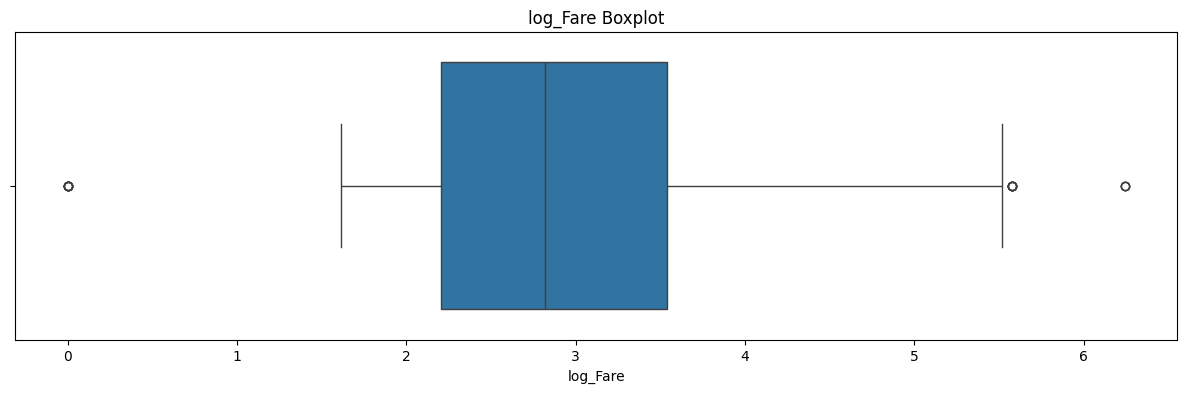

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 4))

boxplot = sns.boxplot(data=df_train, x='log_Fare', ax=ax1)

boxplot.set_title('log_Fare Boxplot')

Удалим выбросы тем же методом Тьюки.

In [ ]:
outliers, cleaned = outliers_iqr(df_train, 'log_Fare')

print(f'Число выбросов по методу Тьюки (1.5 IQR): {outliers.shape[0]}')

Число выбросов по методу Тьюки (1.5 IQR): 16


In [ ]:
df_train = cleaned

In [ ]:
df_train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Embarked,Sex_male,log_Fare
0,0,3,1,22,1,0,2,1,2.110213
1,1,1,2,38,1,0,0,0,4.280593
2,1,3,7,26,0,0,2,0,2.188856
3,1,1,5,35,1,0,2,0,3.990834
4,0,3,0,35,0,0,2,1,2.202765


In [ ]:
df_test.head()

,Pclass,Name,Age,SibSp,Parch,Embarked,Sex_male,log_Fare
0,3,10,34,0,0,1,1,2.178064
1,3,21,47,1,0,2,0,2.079442
2,2,12,62,0,0,1,1,2.369075
3,3,21,27,0,0,2,1,2.268252
4,3,7,22,1,1,2,0,2.586824


Изобразим тепловую карту признаков, чтобы выявить корреляцию.

Text(0.5, 1.0, 'Корреляция между признаками\n')

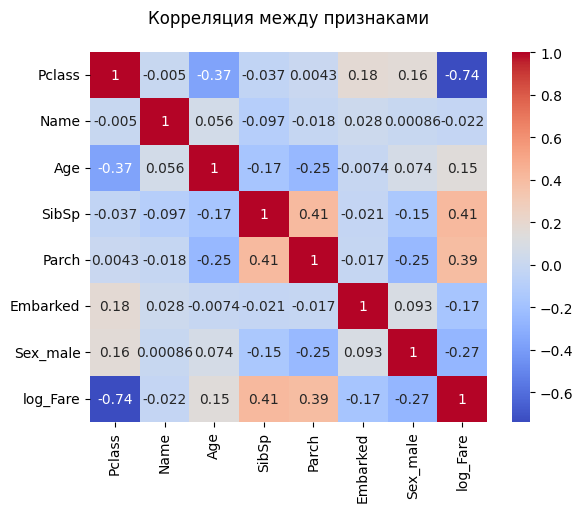

In [ ]:
corr = df_train.drop(['Survived'], axis=1).corr(method='spearman')

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляция между признаками\n')

Text(0.5, 1.0, 'Корреляция между признаками\n')

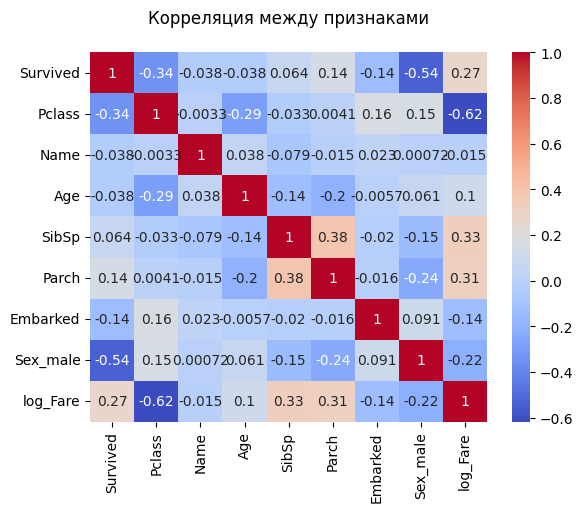

In [ ]:
corr = df_train.corr(method='kendall')

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляция между признаками\n')

Pclass отрицательно коррелирует с Fare, что логично, т.к. чем выше класс билета, тем выше его стоимость.

Имя в среднем не коррелирует ни с чем, но наиболее сильная корреляция с числом братьев, сестер и супругов (Parch), что примечательно.

Age коррелирует с классом билета и его стоимотью, что логично.

SibSp коррелирует с Parch и Fare.

Parch коррелирует с Fare.

Стоимость билета (Fare) коррелирует с полом пассажира.

Порт назначения (Embarked) также коррелирует с полом.

Интересно, что признак Survived, который наз как раз интересует, наиболее сильно связан с полом пассажира, чуть менее и почти в равной степени со стоимостью билета и его классом, и еще в меньшей степени с присутствием/отсутствием родителей/детей на борту корабля и портом назначения (Embarked).

Построим на распределение Survived в зависимости от признаков Age и Fare.

Text(0.5, 1.0, 'Scatter Plot for Glucose VS BMI')

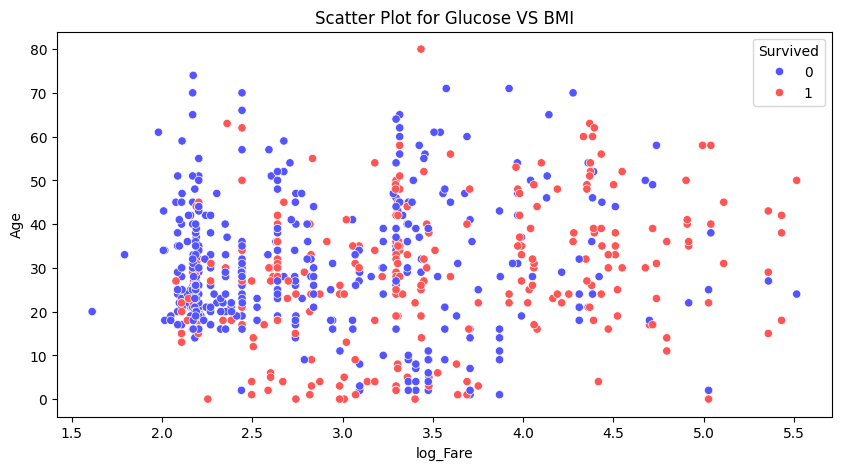

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.scatterplot(
    data=df_train,
    x='log_Fare',
    y='Age',
    hue='Survived',
    palette='seismic',
    ax=ax,
);

ax.set_title('Scatter Plot for Glucose VS BMI')

Как видим, данные все еще распределены очень кучно по стоимости билета. Прологарифмируем 2 раз, теперь уже признак log_log_Fare.

In [ ]:
df_test['log_log_Fare'] = df_test['log_Fare'].apply(lambda x: np.log(x + 1))

In [ ]:
df_train['log_log_Fare'] = df_train['log_Fare'].apply(lambda x: np.log(x + 1))

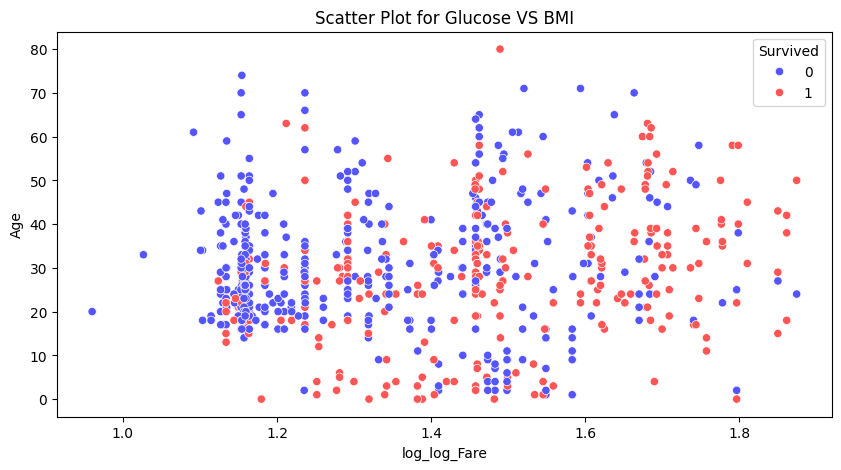

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.scatterplot(
    data=df_train,
    x='log_log_Fare',
    y='Age',
    hue='Survived',
    palette='seismic',
    ax=ax,
);

ax.set_title('Scatter Plot for Glucose VS BMI');

Стало лучше. По данной видуализации интуитивно не видно гипотетической разделяющей поерхности ни 1-го, ни 2-го порядка. Заметны "островки", и, главное, вертикальные полосы из пассажиров разног возраста, но с одинаковой стоимостью билета. Это очень весомый аргумент в пользу построения классификатора, основанного на решающих деревьях. Еще одним решающим аргументом является отсутствие нормального распределения непрерывных признаков.

Поскольку мы решили использовать ансамблевые методы, в нормализации и стандартизации признаков нет необходимости.

In [ ]:
df_train = df_train.drop(['log_Fare'], axis=1)
df_test = df_test.drop(['log_Fare'], axis=1)

In [ ]:
df_train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Embarked,Sex_male,log_log_Fare
0,0,3,1,22,1,0,2,1,1.134691
1,1,1,2,38,1,0,0,0,1.664038
2,1,3,7,26,0,0,2,0,1.159662
3,1,1,5,35,1,0,2,0,1.607603
4,0,3,0,35,0,0,2,1,1.164014


In [ ]:
df_test.head()

,Pclass,Name,Age,SibSp,Parch,Embarked,Sex_male,log_log_Fare
0,3,10,34,0,0,1,1,1.156272
1,3,21,47,1,0,2,0,1.124748
2,2,12,62,0,0,1,1,1.214638
3,3,21,27,0,0,2,1,1.184255
4,3,7,22,1,1,2,0,1.277267


In [ ]:
pd.value_counts(df_train['Name'])

<ipython-input-106-d6379d4b7cf9>:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



,count
Name,
1,66
2,62
18,61
7,58
0,50
12,41
6,37
15,36
3,36


Как видим, имен не так много. Поэтому оставим этот признак, быть может, мы найдем самое счастливое или несчастливое имя.

## Моделирование, предсказание

Будем обучать модель, построенную на алгоритме градиентного бустинга (XGBoost), на всех призаках. Сперва разделим df_train на тренировочную и валидационную выборку. Однако есть подозрение, что 8 признаков для примерно 700 примеров приведет к проявлению dimension curse. Поэтому напишем сгенерируем все сочетания признаков, начиная с 2 и будем искать лучшую модель.

In [ ]:
import xgboost as xgb

In [ ]:
column_names = df_train.drop('Survived', axis=1).columns.tolist()

In [ ]:
from itertools import combinations

combinations_list = list()
for i in range(2, len(column_names)):
  A = list(combinations(column_names, i))
  for x in A: combinations_list.append(list(x))

len(combinations_list)

246

In [ ]:
def boosting(data, comb):
  t = 1
  for x in comb:
    X = data[x]
    y = data['Survived']

    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)

    params = {'objective':'binary:hinge',
              'eta':0.5,
              'max_depth':2,
              'subsample':0.5,
              'colsample_bytree':0.5,
              'gamma':1e-02,
              'alpha':1e-02,
              }

    evals_result = {}

    model = xgb.train(
        params,
        dtrain,
        num_boost_round=100,
        evals=[(dval, 'validation')],
        early_stopping_rounds=4,
        evals_result=evals_result,
        verbose_eval=False
        )

    p = min(evals_result['validation']['error'])

    if p < t:
      best_combination = x
      t = p
      best_model_ = model

  return best_combination, t, best_model_

In [ ]:
boost = boosting(df_train, combinations_list)
best_model = boost[2]
print(f'Признаки: {", ".join(boost[0])}\nError: {boost[1]}')

Признаки: Pclass, Age, SibSp, Parch, Embarked, Sex_male
Error: 0.1761904761904762


Попробуем обучить на всех признаках

In [ ]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [ ]:
params = {'objective':'binary:hinge',
          'eta':0.5,
          'max_depth':3,
          'subsample':0.5,
          'colsample_bytree':0.5,
          'gamma':1e-02,
          'alpha':1e-02,
          }

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

clf = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dval, 'validation')],
    early_stopping_rounds=7
    )

[0]	validation-error:0.23333
[1]	validation-error:0.22381
[2]	validation-error:0.26190
[3]	validation-error:0.25714
[4]	validation-error:0.23333
[5]	validation-error:0.21429
[6]	validation-error:0.22381
[7]	validation-error:0.21429
[8]	validation-error:0.21905
[9]	validation-error:0.22857
[10]	validation-error:0.24286
[11]	validation-error:0.24286


Как видим, dimension curse появляется не так сильно, однако нам перебором удалось улучшить модель на 4 %.

Обучим теперь на 2 признаках: Age и log_log_Fare, сделаем визуализацию.

In [ ]:
X = df_train[['log_log_Fare', 'Age']]
y = df_train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.3)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {'objective':'binary:hinge',
          'eta':0.5,
          'max_depth':2,
          'subsample':0.5,
          'colsample_bytree':0.5,
          'gamma':1e-02,
          'alpha':1e-02,
          }

model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dval, 'validation')],
    early_stopping_rounds=20,
    )

[0]	validation-error:0.39048
[1]	validation-error:0.31905
[2]	validation-error:0.31429
[3]	validation-error:0.31905
[4]	validation-error:0.31905
[5]	validation-error:0.31905
[6]	validation-error:0.31429
[7]	validation-error:0.31905
[8]	validation-error:0.31429
[9]	validation-error:0.31905
[10]	validation-error:0.32381
[11]	validation-error:0.31905
[12]	validation-error:0.31429
[13]	validation-error:0.30952
[14]	validation-error:0.31429
[15]	validation-error:0.30952
[16]	validation-error:0.30952
[17]	validation-error:0.31429
[18]	validation-error:0.30476
[19]	validation-error:0.30476
[20]	validation-error:0.30952
[21]	validation-error:0.30476
[22]	validation-error:0.30476
[23]	validation-error:0.30476
[24]	validation-error:0.30476
[25]	validation-error:0.30476
[26]	validation-error:0.30476
[27]	validation-error:0.30476
[28]	validation-error:0.30476
[29]	validation-error:0.30476
[30]	validation-error:0.30476
[31]	validation-error:0.30476
[32]	validation-error:0.30000
[33]	validation-erro

Ошибка очень сильно выросла.

In [ ]:
def plot_classifier(X_train, columns_name, col_1, col_2, model):
  index_1 = columns_name.index(col_1)
  index_2 = columns_name.index(col_2)

  x_min, x_max = X_train[:, index_1].min() - 1, X_train[:, index_1].max() + 1
  y_min, y_max = X_train[:, index_2].min() - 1, X_train[:, index_2].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                       np.arange(y_min, y_max, 0.01))

  dgrid = xgb.DMatrix(np.c_[xx.ravel(), yy.ravel()])

  Z = model.predict(dgrid)
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
  plt.scatter(X_train[:, index_1],
              X_train[:, index_2],
              c=y_train,
              s=20,
              edgecolor='k',
              cmap='bwr')

  plt.xlabel(col_1)
  plt.ylabel(col_2)
  plt.title('Decision Surface of XGBoost Classifier')
  plt.show()

In [ ]:
column_names_1 = X.columns.tolist()

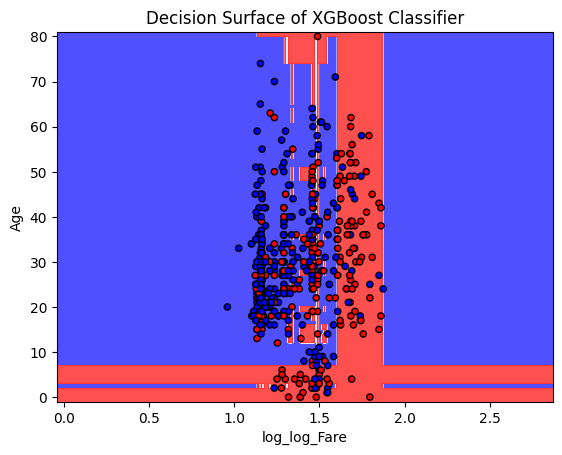

In [ ]:
plot_classifier(X_train, column_names_1, 'log_log_Fare', 'Age', model)

Мы специально допустили модели заоферфиттиться, чтобы было видно, как она пытается выделить из плотных полос одной цены участки с выжившими ии погибшими. Как видим, получается совсем плохо.

Построим визуализацию лучшего ансамбля, который мы получили ранее. Изобразим несколько деревьев в модели.

In [ ]:
boost[0]

['Pclass', 'Age', 'SibSp', 'Parch', 'Embarked', 'Sex_male']

In [ ]:
print(f'Число деревьев в ансамбле: {len(bst.get_dump())}')

Число деревьев в ансамбле: 21


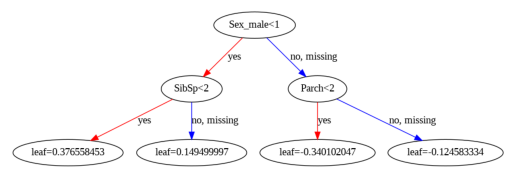

In [ ]:
from xgboost import plot_tree

bst = boost[2]

plot_tree(bst, num_trees=2)
plt.show()

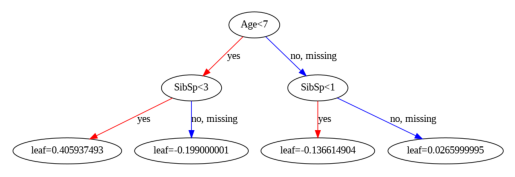

In [ ]:
plot_tree(bst, num_trees=3)
plt.show()

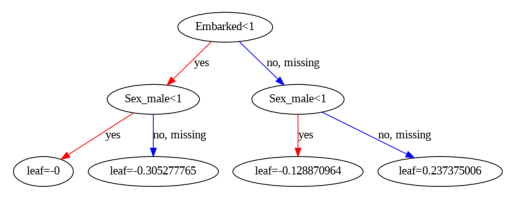

In [ ]:
plot_tree(bst, num_trees=10)
plt.show()

**Перейдем к предсказанию.** Для подгрузки предсказания на kaggle нужно, чтобы были все строки. Заменим null-ы в Age медианными значениями.

In [ ]:
df_test_ = pd.read_csv('test.csv')

In [ ]:
df_test_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
df_test_.loc[df_test_['Age'].isna(), 'Age'] = df_test_['Age'].median()

In [ ]:
df_test_ = pd.get_dummies(df_test_, columns=['Sex'])

In [ ]:
df_test_['Sex_male'] = df_test_['Sex_male'].apply(lambda x: int(x))

In [ ]:
df_test_['Name'] = label_encoder.fit_transform(df_test_['Name'])
df_test_['Embarked'] = label_encoder_.fit_transform(df_test_['Embarked'])

In [ ]:
df_test_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Sex_female   418 non-null    bool   
 11  Sex_male     418 non-null    int64  
dtypes: bool(1), float64(2), int64(7), object(2)
memory usage: 36.5+ KB


In [ ]:
X_pred = df_test_[boost[0]]
dpred = xgb.DMatrix(X_pred)
Z = bst.predict(dpred)

In [ ]:
df_test_['Survived'] = Z

In [ ]:
df_test_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Sex_female   418 non-null    bool   
 11  Sex_male     418 non-null    int64  
 12  Survived     418 non-null    int64  
dtypes: bool(1), float64(2), int64(8), object(2)
memory usage: 39.7+ KB


In [ ]:
df_test_['Survived'] = df_test_['Survived'].astype('int')

In [ ]:
df_test_.head(10)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Survived
0,892,3,206,34.5,0,0,330911,7.8292,NaN,1,False,1,0
1,893,3,403,47.0,1,0,363272,7.0000,NaN,2,True,0,0
2,894,2,269,62.0,0,0,240276,9.6875,NaN,1,False,1,0
3,895,3,408,27.0,0,0,315154,8.6625,NaN,2,False,1,0
4,896,3,178,22.0,1,1,3101298,12.2875,NaN,2,True,0,0
5,897,3,366,14.0,0,0,7538,9.2250,NaN,2,False,1,0
6,898,3,84,30.0,0,0,330972,7.6292,NaN,1,True,0,1
7,899,2,57,26.0,1,1,248738,29.0000,NaN,2,False,1,0
8,900,3,4,18.0,0,0,2657,7.2292,NaN,0,True,0,1
9,901,3,103,21.0,2,0,A/4 48871,24.1500,NaN,2,False,1,0


In [ ]:
df_test__ = pd.read_csv('test.csv')

In [ ]:
df_test__['Survived'] = df_test_['Survived'].astype('int')

In [ ]:
df_test___ = df_test__[['PassengerId', 'Survived']]

In [ ]:
df_test___.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
df_test___.to_csv('output.csv', index=False)

Получаем следующий результат на Kaggle

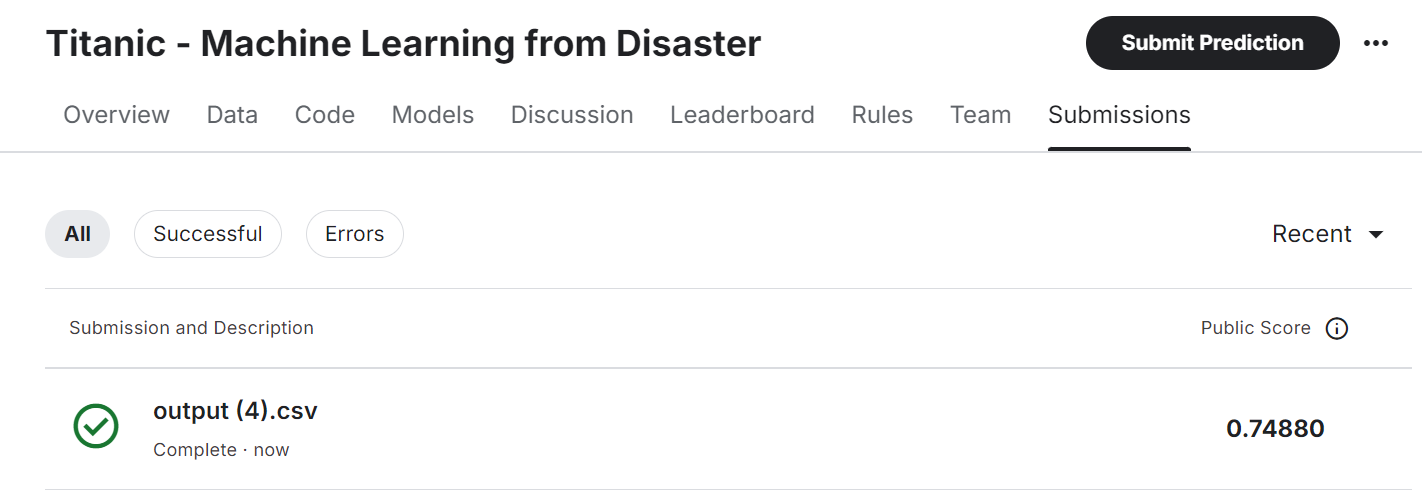

Итак, подведем итоги.

Мы обработали практически все признаки из доступных, которые не предусматривают токенизации.

Перебрали все сочетания признаков после обработки данных и выявили, что при прочих равных (гиперпараметрах обучения) более мощными предиктивными свойствами обладают категориальные признаки, а также Age, несмотря на наши большие надежды на сочетание Age и значений функций от Fare.

Полезными оказались 6 из 8 признаков: Fare для XgBoost слишком сложен, так как он сконцентрирован в вертикальных полосах. Name также оказался бесполезным, несмотря на нашу гипотезу.

В целом, для настолько "непонятных" данных XGBoost дал неплохой результат. Заметим, что на тестовой выборке модель дала худший результат, чем на вализационной. Вполне возможно, это связано с нашей заменой признака Age медианным значением.

In [ ]:
# Доля строк без null в Age
print(f'{332 / 418 :.2f}')

0.79
